# Toy regression

In [137]:
import statsmodels.api as sm
import statsmodels

In [145]:
mdl = sm.GLM(endog=df.call_count,exog=df.population,family=sm.families.Poisson()).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             call_count   No. Observations:                 1442
Model:                            GLM   Df Residuals:                     1441
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2342.8
Date:                Sat, 05 Feb 2022   Deviance:                       1367.4
Time:                        15:41:10   Pearson chi2:                 2.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            -0.2745
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.0017   8.73e-05     19.084      0.000       0.001       0.002
==============================================================================
"""

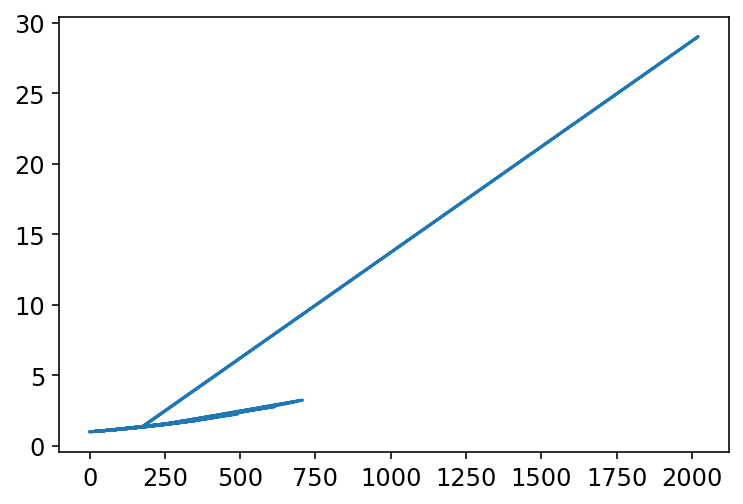

In [146]:
plt.plot(df.population,mdl.predict(df.population))

## Use glm to fit where dependent on log feature

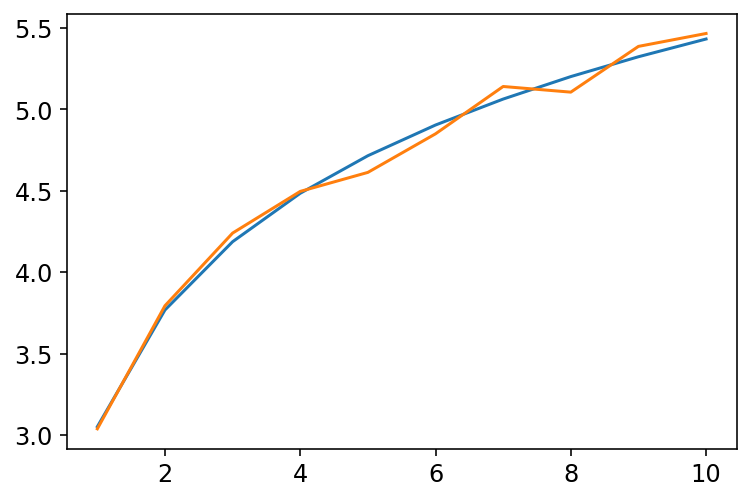

In [267]:
def log_tfrm(x):
    return (np.log(x)+3)+.2*np.random.rand(len(x))

x = np.linspace(1,10,10)
y = log_tfrm(x)
# mdl = sm.GLM(y,sm.add_constant(x),).fit()
mdl = sm.GLM(y,sm.add_constant(np.log(x))).fit()

plt.plot(x,mdl.params[0]+np.log(x)*mdl.params[1])
plt.plot(x,y)

## Use glm to fit a poisson distributed Y
link function is just log, such that
$$\log{y}=\beta x$$

Generating data such that lambda increases at 2x: doesn't work because it violates the assumption that lambda varies linearly with X. So you have to either exponentiate y before throwing it in, or just not model it with a poisson process. Pretty interesting demonstration that even if something is generated with a poissonian process, if the rate determining factors can't be expressed linearly as an exponential, it's not going to work.

If you exponentiate y, you get systematically larger coefficients that actually exist (by ~10%), probably due to numerical issues I'd guess

In [228]:
x = np.arange(3,100.01,)
def true_lambda(x):
    return 2*x
y = np.random.poisson(true_lambda(x))#+(0.01*np.random.rand())
# y = true_lambda(x)#+(0.01*np.random.rand())

In [230]:
df = pd.DataFrame(np.vstack((x,y)).T,columns=['x','y'])

In [253]:
from patsy import dmatrices, dmatrix
# formula = 'y ~ 0 + np.log(x)'
# formula = 'np.exp(y) ~ 0 + x'
formula = 'y ~ 0 + x'

response, predictors = dmatrices(formula,df)

In [254]:
# mdl = sm.GLM(response,predictors,family=sm.families.Poisson()).fit()
mdl = sm.GLM(response,predictors).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   98
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                          74.828
Method:                          IRLS   Log-Likelihood:                -350.00
Date:                Tue, 08 Feb 2022   Deviance:                       7258.3
Time:                        10:20:52   Pearson chi2:                 7.26e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9930      0.015    134.014      0.000       1.964       2.022
==============================================================================
"""

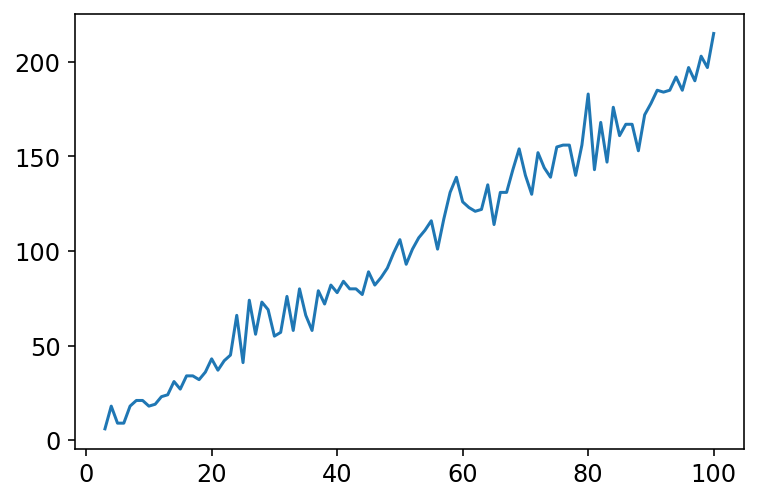

In [256]:
plt.plot(x,y)

In [240]:
np.exp(1.1)

3.0041660239464334

In [207]:
np.log(.3371)

-1.087375656742122

In [196]:
x = np.arange(3,10.01,.1)
def true_lambda(x):
    return 2*x
y = np.log(np.random.poisson(true_lambda(x)))+(0.01*np.random.rand())
# y = true_lambda(x)#+(0.01*np.random.rand())

In [197]:
df = pd.DataFrame(np.vstack((x,y)).T,columns=['x','y'])

In [198]:
from patsy import dmatrices, dmatrix
formula = 'y ~ 0 + x'

response, predictors = dmatrices(formula,df)

In [199]:
mdl = sm.GLM(response,predictors,family=sm.families.Poisson()).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:                            GLM   Df Residuals:                       70
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.93
Date:                Sun, 06 Feb 2022   Deviance:                       5.4891
Time:                        15:46:35   Pearson chi2:                     5.78
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02312
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.1254      0.011     11.782      0.000       0.105       0.146
==============================================================================
"""

In [201]:
np.exp(.125)

1.1331484530668263